## Happiness, Mental Illness, and Drug Overdose Deaths Across the 50 States and DC

## Purpose of this project: 
To compare happiness levels per State with Drug Overdose levels as well as instance of mental illness per state. Additionally, I will look at which states have the most readily available Naloxone. 
Naloxone is a medication approved by the Food and Drug Administration (FDA) designed to rapidly reverse opioid overdose. It is an opioid antagonist—meaning that it binds to opioid receptors and can reverse and block the effects of other opioids, such as heroin, morphine, and oxycodone.
According to my research: 8 states currently allow individuals to get naloxone from a pharamcy without a prescription. I want to compare which states have high levels of overdose with those with less restriction on obtaining Naloxone. 

In [ ]:
#import packages needed for first data read
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

## 1. Happiness Rankings by State using 3 main indicators: 
   -Emotional and Physical Wellbeing, Work Environment, Community & Environment 

In [ ]:
#get the table from html website
happiness_rank = pd.read_html('https://worldpopulationreview.com/state-rankings/happiest-states')[0]

In [ ]:
#create function for making a ranking columns based on index after sorting
def ranker(df): 
    return df.index + 1

In [ ]:
#see if ranking column was added
happiness_rank['Happy_Rank'] = ranker(happiness_rank)

In [ ]:
#get top 10 happiest states via head
happiness_rank.head(10)

The 5 "happiest" states are: Hawaii, Utah, Minnesota, North Dakota, and California 

In [ ]:
#the 10 least happy states 
happiness_rank.tail(10)

In [ ]:
#do a reverse rank to view states by least happy - this is for the purpose of averaging ranks later in the file 
reverse_happy = happiness_rank.sort_values(by='Happy_Rank',ascending=False).reset_index()
#use ranker function to add a ranker of most unhappy states 
reverse_happy['least_happy'] = ranker(reverse_happy)
reverse_happy

In [70]:
#get the least happy states 
reversed_happy = reverse_happy.head(10)
reversed_happy

,index,State,Total Score,Emotional & Physical Well Being,Work Environment,Community & Environment,Happy_Rank,least_happy
0,49,West Virginia,33.42,49,48,32,50,1
1,48,Arkansas,36.61,50,29,23,49,2
2,47,Louisiana,37.15,44,50,41,48,3
3,46,Alaska,38.21,33,49,50,47,4
4,45,Oklahoma,38.89,47,35,33,46,5
5,44,Alabama,39.35,46,39,43,45,6
6,43,Kentucky,39.42,48,19,19,44,7
7,42,Mississippi,41.63,42,46,26,43,8
8,41,Missouri,42.76,45,34,21,42,9
9,40,New Mexico,43.35,39,47,35,41,10


In [72]:
reversed_happy['State'].tolist()

['West Virginia',
 'Arkansas',
 'Louisiana',
 'Alaska',
 'Oklahoma',
 'Alabama',
 'Kentucky',
 'Mississippi',
 'Missouri',
 'New Mexico']

The 5 least happy states are: Oklahoma, Alaska, Louisiana, Arkansas, and West Virginia 

## 2. Deaths by Drug Overdose among the states in the last year 

In [ ]:
#import overdose rate data from KFF website 
#renmane column Location to State for future consistency/merging 
death_rates = pd.read_csv(' Opioidsdeath.csv')
death_rates.rename(columns={'Location':'State'}, inplace=True)

In [ ]:
#note the rates are per 100,000 population 
opioids_sort= death_rates.sort_values(by=['Opioid Overdose Death Rate (Age-Adjusted)'],ascending=False).reset_index()
opioids_sort['death_rank'] = ranker(opioids_sort)
alldrug_sort = death_rates.sort_values(by=['All Drug Overdose Death Rate (Age-Adjusted)'],ascending=False)
opioids_sort.columns

In [66]:
opioid_sum = opioids_sort.head(10)
opioid_sum['death_rank'] = ranker(opioid_sum)
opioid_sum

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,State,Opioid Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted),death_rank
0,7,Delaware,43.0,48.0,1
1,48,West Virginia,41.4,52.8,2
2,20,Maryland,34.0,38.2,3
3,8,District of Columbia,33.7,43.2,4
4,6,Connecticut,31.7,34.7,5
5,35,Ohio,31.5,38.3,6
6,29,New Hampshire,29.1,32.0,7
7,21,Massachusetts,28.9,32.1,8
8,30,New Jersey,28.4,31.7,9
9,19,Maine,26.4,29.9,10


In [68]:
#get list of the ten states with highest rate of opioid overdose deaths per 100,000 (will use this list for results at end of project)
opioid_sum['State'].tolist()

['Delaware',
 'West Virginia',
 'Maryland',
 'District of Columbia',
 'Connecticut',
 'Ohio',
 'New Hampshire',
 'Massachusetts',
 'New Jersey',
 'Maine']

In [102]:
#regular all drug (non opioid specific deaths)
drug_sum = alldrug_sort.head(10)

merge the two sorted groups of death rates together to see which of the ten states for highest opioid overdoses are also in the top ten highest for all drug overdoses 

In [101]:
overdose_summary = pd.merge(opioid_sum, drug_sum, on = 'State', how = 'inner')

In [100]:
#use merged data tp see which states are in both top ten for opioid overdose and all drug overdose
overdose_summary

,index,State,Opioid Overdose Death Rate (Age-Adjusted)_x,All Drug Overdose Death Rate (Age-Adjusted)_x,death_rank,Opioid Overdose Death Rate (Age-Adjusted)_y,All Drug Overdose Death Rate (Age-Adjusted)_y
0,7,Delaware,43.0,48.0,1,43.0,48.0
1,48,West Virginia,41.4,52.8,2,41.4,52.8
2,20,Maryland,34.0,38.2,3,34.0,38.2
3,8,District of Columbia,33.7,43.2,4,33.7,43.2
4,6,Connecticut,31.7,34.7,5,31.7,34.7
5,35,Ohio,31.5,38.3,6,31.5,38.3
6,29,New Hampshire,29.1,32.0,7,29.1,32.0
7,21,Massachusetts,28.9,32.1,8,28.9,32.1


Observation: 7/10 states are in the top 10 for both opioid overdoses per 100,000 and all drug overdoses 

In [86]:
#now lets see the 10 states with the lowest overdose death rate: 
least_opioids = death_rates.sort_values(by=['Opioid Overdose Death Rate (Age-Adjusted)'])
least_opioids = least_opioids.head(10)

In [87]:
#see which states have th lowest overall drug death overdose rate 
least_drugs = death_rates.sort_values(by=['All Drug Overdose Death Rate (Age-Adjusted)'])
least_drugs = least_drugs.head(10)

In [103]:
#merge the two data sets and see which states are common in having lowest all drug overdose death rate and opioid specific death rate 
least_overdoes_sum = pd.merge(least_drugs, least_opioids, on = 'State', how = 'inner')

In [89]:
least_overdoes_sum

,State,Opioid Overdose Death Rate (Age-Adjusted)_x,All Drug Overdose Death Rate (Age-Adjusted)_x,Opioid Overdose Death Rate (Age-Adjusted)_y,All Drug Overdose Death Rate (Age-Adjusted)_y
0,Nebraska,3.6,8.7,3.6,8.7
1,South Dakota,4.5,10.5,4.5,10.5
2,Texas,5.1,10.8,5.1,10.8
3,North Dakota,5.9,11.4,5.9,11.4
4,Iowa,5.4,11.5,5.4,11.5
5,Arkansas,7.0,13.5,7.0,13.5


Observation: 5/10of the states with the least opioid deaths are shared among the least of the lowest amount of all drug overdoes
For remainder of work in this project, we will be focusing on the opioid rates/ranking

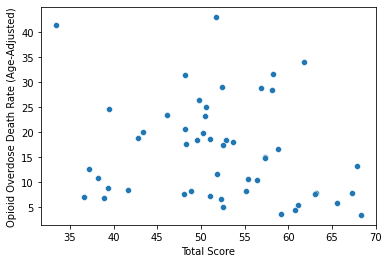

In [108]:
opioids_happiness = pd.merge(happiness_rank,opioids_sort, on = 'State', how = 'inner')
opioids_happiness
sns.scatterplot(x="Total Score", y="Opioid Overdose Death Rate (Age-Adjusted)", data=opioids_happiness);

This visualization was created to see if there was any major correlaiton between opioid overdoes death rate and total happiness score. I expected more of strong linear negative correlation as to sugggest that while happiness score increases, deaths would decrease. Unfrotuantely, the groah does not support this notion. 

## 3.  Mental Illness % among the states in the last year 

In [ ]:
#import overdose death data: 
mental_illness= pd.read_csv('mental_illness.csv')
mental_illness 
#renmane column Location to State for future consistency/merging 
mental_illness.rename(columns={'Location':'State'}, inplace=True)
mental_illness
#sort values and create ranked column based on serious mental illness 
mental_illness = mental_illness.sort_values(by = 'Adults Reporting Serious Mental Illness in the Past Year', ascending=False).reset_index()
mental_illness['MH_Rank'] = ranker(mental_illness)

In [ ]:
#see the ten states reporting the highest percentage of serious mental illness
seriousMH= mental_illness.head(10)
seriousMH.style.format({'Adults Reporting Any Mental Illness in the Past Year': "{:.2%}",'Adults Reporting Serious Mental Illness in the Past Year': "{:.2%}"})

In [77]:
#lets see the connection between serious mental illness and happiness, and also between serious mental illness % reported and overdose deaths 

MH_Happy = pd.merge(seriousMH, reversed_happy, on = 'State', how = 'inner')
MH_Happy = MH_Happy[['State', 'MH_Rank', 'least_happy']]

MH_Deaths =  pd.merge(seriousMH, opioid_sum, on = 'State', how = 'inner')
MH_Deaths = MH_Deaths[['State', 'MH_Rank', 'death_rank']]


In [78]:
#display the output of these merged dataframes in one output 
from IPython.display import display, HTML
css = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(css))
#try it out
display(MH_Deaths)
display(MH_Happy)

,State,MH_Rank,death_rank
0,West Virginia,4,2
1,Ohio,5,6


,State,MH_Rank,least_happy
0,Arkansas,2,2
1,West Virginia,4,1
2,Oklahoma,7,5


observation: 3 states are shared between the most unhappy and highest percentage of serious mental illness, 2 states are shared between the highest death rate via opioids and highestpercentage of serious mental illness reported. Mote West virginia appears in both. 

In [104]:
#merge all overdoes with all death rates so we can create a scatterplot below
MH_Death_corr =pd.merge(mental_illness, opioids_sort, on = 'State', how = 'inner')
#view column names for scatterplot purposes below
MH_Death_corr.columns

Index(['index_x', 'State',
       'Adults Reporting Any Mental Illness in the Past Year',
       'Adults Reporting Serious Mental Illness in the Past Year', 'MH_Rank',
       'index_y', 'Opioid Overdose Death Rate (Age-Adjusted)',
       'All Drug Overdose Death Rate (Age-Adjusted)', 'death_rank'],
      dtype='object')

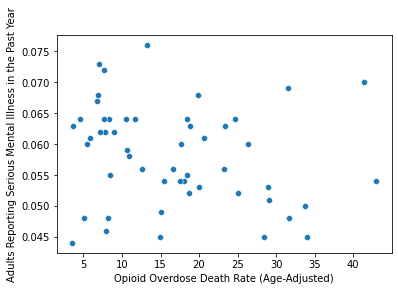

In [105]:
##Visualization #1: 
##Overall Correlation between mental illness rankings and death rankings 

import seaborn as sns
sns.scatterplot(x="Opioid Overdose Death Rate (Age-Adjusted)", y="Adults Reporting Serious Mental Illness in the Past Year", data=MH_Death_corr);

In [ ]:
sns.scatterplot(x="Opioid Overdose Death Rate (Age-Adjusted)", y="", data=MH_Death_corr);

Looking above, there doesnt seem to be any major correlation. I would have expected more linear results here.  No results are still results! 

In [ ]:
sns.scatterplot(x="MH_Rank", y="Opioid Overdose Death Rate (Age-Adjusted)", data=MH_Death_corr);

## 4. Naloxone Access: 
use data from: https://preventionsolutions.edc.org/services/resources/state-naloxone-access-laws
to find which states have the least strict restrictions on obtaining naloxone 
Specifically, we want to know what states don't require a prescription to get naloxone at a pharmacy

In [90]:
#next we want to know what states do not require a prescription to get naloxone at a pharmacy 
#import packages 
#parse the text 
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 
import re
from collections import Counter
import urllib.request

url = 'https://preventionsolutions.edc.org/services/resources/state-naloxone-access-laws'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [91]:
#get the information we desire from the HTML (the states that dont require a prescription for naloxone)
#see the formatting 
title = (soup.find(text=re.compile('Permission for pharmacists')))
states = (soup.find(text=re.compile('Eight')))
print(title,states)

Permission for pharmacists to dispense naloxone to individuals without a prescription
 Eight states—California, Kentucky, New Hampshire, New Mexico, New York, Rhode Island, Vermont, and Washington state allow this.


In [92]:
#create a function to print out the output of what states require no prescription 
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [ ]:
#test function with outout variable for the information about naloxone states 
output = ("%s : %s"%(title,states))
printmd(output)

In [93]:
#we want the eight states that allow for pharmacists to dispense naloxone without a prescription in a list 
#unfortunately, this will require renaming the first and last items in the list after we split the states item by comma 
statelist = states.split(",")

#getting "California" on its own 
state1 = statelist[0]
state1 
#use split transforamtion 
state1 = state1.split("—")
state1
first = state1[1]

In [ ]:
#getting "Washington" on its own 
state8 = statelist[7]
state8
#use split transformation 
last = state8.split()
last = last[1]

In [94]:
#join the other 6 states with washington and california to get our list of 8 states 
#append first and last to the other states 
abridged = statelist[1:7:1]
abridged.append(last)
abridged
abridged.append(first)
abridged2 = [x.strip(' ') for x in abridged]
abridged2

['Kentucky',
 'New Hampshire',
 'New Mexico',
 'New York',
 'Rhode Island',
 'Vermont',
 'Washington',
 'California']

In [95]:
#print a new summary of the states: 
print(title,":",abridged)

Permission for pharmacists to dispense naloxone to individuals without a prescription
 : [' Kentucky', ' New Hampshire', ' New Mexico', ' New York', ' Rhode Island', ' Vermont', 'Washington', 'California']


In [96]:
#put the list of states into a dataframe, make state column so it can be merged with other data
naloxonelist = pd.DataFrame(abridged2, columns = ['State'])
naloxonelist

,State
0,Kentucky
1,New Hampshire
2,New Mexico
3,New York
4,Rhode Island
5,Vermont
6,Washington
7,California


In [97]:
#first merge naloxone data with happiness data, then add in death data 
happy_naloxone =  pd.merge(naloxonelist, reverse_happy, on = 'State', how = 'inner')
happy_naloxone

,State,index,Total Score,Emotional & Physical Well Being,Work Environment,Community & Environment,Happy_Rank,least_happy
0,Kentucky,43,39.42,48,19,19,44,7
1,New Hampshire,23,52.37,23,27,31,24,27
2,New Mexico,40,43.35,39,47,35,41,10
3,New York,14,57.35,5,42,39,15,36
4,Rhode Island,30,50.44,30,31,29,31,20
5,Vermont,37,48.18,26,23,48,38,13
6,Washington,16,56.44,29,5,9,17,34
7,California,4,63.14,4,24,12,5,46


In [98]:
#merge naloxone happiness data with State death Rates from opioid Drug overdose 
bigjoin = pd.merge(happy_naloxone,mental_illness, on = 'State', how = 'inner')
bigjoin2 = pd.merge(bigjoin, opioids_sort, on = 'State', how = 'inner')

In [99]:
#view
naloxone_states = bigjoin2[['State', 'Happy_Rank','MH_Rank', 'death_rank','Opioid Overdose Death Rate (Age-Adjusted)']]
naloxone_states

,State,Happy_Rank,MH_Rank,death_rank,Opioid Overdose Death Rate (Age-Adjusted)
0,Kentucky,44,15,12,24.6
1,New Hampshire,24,42,7,29.1
2,New Mexico,41,39,16,20.0
3,New York,15,51,28,14.9
4,Rhode Island,31,31,14,23.3
5,Vermont,38,23,15,20.7
6,Washington,17,13,34,10.5
7,California,5,48,39,7.9


In [ ]:
#next we are going to recreate the same summary table but with the states that do not allow individuals to get naloxone from a pharmacy without an rx  
no_naloxone_states2 = pd.merge(reverse_happy,mental_illness, on = 'State', how = 'inner')
no_naloxone_states1 = pd.merge(no_naloxone_states2, opioids_sort, on = 'State', how = 'inner')
no_naloxone_states3 = no_naloxone_states1[['State', 'Happy_Rank','MH_Rank', 'death_rank', 'Opioid Overdose Death Rate (Age-Adjusted)']]
no_naloxone_states = pd.merge(no_naloxone_states3, naloxonelist, on ='State', how = 'outer')

In [ ]:
#use drop function to drop the states that are shared between our merged all states table and naloxone table to just leave us with the states not on our naloxone list 
cond = no_naloxone_states['State'].isin(naloxone_states['State'])
no_naloxone_states.drop(no_naloxone_states[cond].index, inplace = True)

In [ ]:
#find averages of each column between non- naloxone and naloxone list states 
nalox_avg = naloxone_states.mean(axis=0)
nalox_avg 
no_nalox_avg = no_naloxone_states.mean(axis=0)
no_nalox_avg
display(no_nalox_avg) 
display(nalox_avg)

to reiterate: 
- A higher rank of happiness means more people are unhappy. 
no naloxone states are "happier" on average than the states allowing it without a prescription (but its not a major difference) 
- A higher rank of MH means that less people are mentally ill. 
less people in the states allowing naloxone are reporting as seriously mentally ill 
- A higher rank of death means less peopld are dying from opioid overdose.
states that allow naloxone on average have more deaths still from opioid overdose than those who are not on the list 

when comparing these averages we must consider how much larger the "non-naloxone" list is so the averages are likely skewed. 


In [ ]:
all_states = no_naloxone_states1[['State', 'Happy_Rank','least_happy','MH_Rank', 'death_rank']]
#make a pivot table to aggregate data so we can soon see average ranking of most opioid deaths, least happy, and highest mental health issues reported 
import numpy as np 
state_ranks=all_states.pivot_table(
    values=['death_rank','MH_Rank','least_happy'],
    index= 'State',
    aggfunc=np.ma.mean)

#use pivot table to create column for average ranking overal and find the worst ten states overall and make them a new variable called "worst states"
state_ranks['average_rank'] = state_ranks.mean(axis=1)
average_score = state_ranks.sort_values(by='average_rank')
worst_states = average_score.head(10)
worst_states


please note that because a low value is bad for each of these columns, I left it in ascending order to show that a lower ranking overall means on average these states are the most unhappy, report the highest levels of mental health issues, and report the highest death count from opioid overdose 

In [ ]:
#use visualizations for worst states to see breakdown 

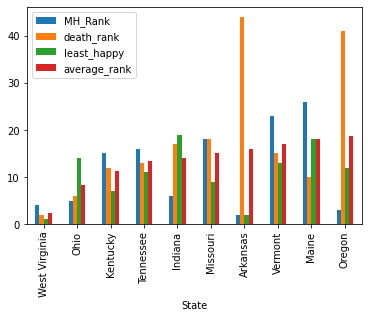

In [82]:
worst_states.plot(kind='bar')
plt.show()

this graph shows you the order of worst states in our list of ten (notice how other bars change as red increases)

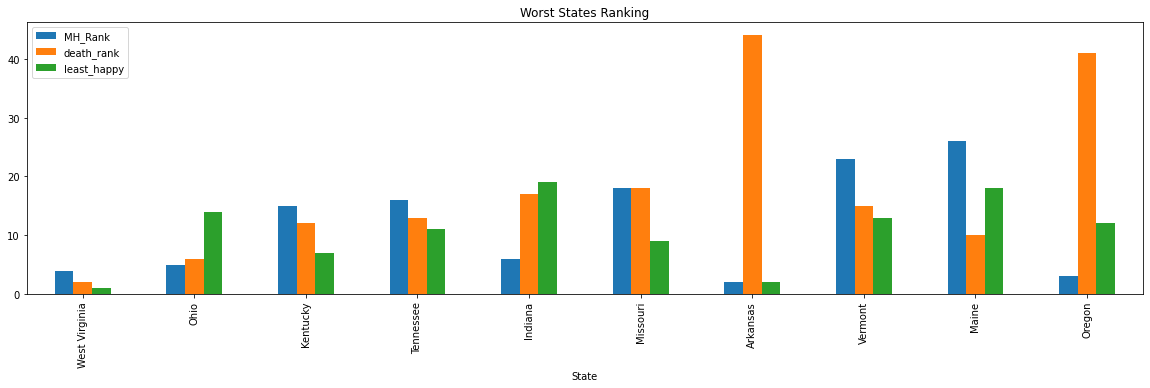

In [83]:
worst_states.plot.bar(y = ['MH_Rank', 'death_rank', 'least_happy'], title = 'Worst States Ranking', figsize = (20,5))

This graph shows which scores really pulled a state into our "worst list" -- note LOWER bars have more weight in pulling the state to this list since a low average in this case is bad for our rankings. 

Note that the high bars actuallly mean a BETTER ranking - for exmaple, arkansas has low death rate for opipiods compared to other states but it ranks high in its number of adults with mental illness and also scored low on happiness sxore datat so its average score is still low, making it one of our "worst states". 

In [84]:
#create a merge to see which states are both naloxone available and on the worst ranking average for most deaths, worst mental health, and least happy. 
average_nalox = pd.merge(worst_states,naloxonelist, on= 'State', how = 'inner')

In [85]:
average_nalox

,State,MH_Rank,death_rank,least_happy,average_rank
0,Kentucky,15,12,7,11.333333
1,Vermont,23,15,13,17.000000


NOTE: only 2 out of the 10 states with the lowest average ranking score (highest death rates, highest mental illness rates, and lowest happiness rates) allows for naloxone distribution without a precription.THIS MUST CHANGE to combat our current opioid epidemic in our country! 

In [79]:
#create naloxone column to specify states on the list or not 
# merge these two dfs together and sort by death rate (greatest to least)
#use this info to create a pivot below
no_naloxone_states['naloxone?'] = 'no'
naloxone_states['naloxone?'] = 'yes'
allstates = (no_naloxone_states, naloxone_states)
aggregate_naloxone = pd.concat(allstates) 
overdose_states = aggregate_naloxone.sort_values(by = 'Opioid Overdose Death Rate (Age-Adjusted)', ascending = False)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [80]:
#make a pivot table to compare totals for opioid overdose death rate from states who allow naloxone with a prescription to those that do not 
import numpy as np 
state_ranks=overdose_states.pivot_table(
    values=['Opioid Overdose Death Rate (Age-Adjusted)'],
    index= 'State',
    columns = 'naloxone?',
    aggfunc='mean', margins = True, margins_name='Total')
state_ranks


Opioid Overdose Death Rate (Age-Adjusted)                
naloxone?                                             no     yes   Total
State                                                                   
Alabama                                         8.900000     NaN   8.900
Alaska                                         10.900000     NaN  10.900
Arizona                                        18.400000     NaN  18.400
Arkansas                                        7.000000     NaN   7.000
California                                           NaN   7.900   7.900
Colorado                                       10.600000     NaN  10.600
Connecticut                                    31.700000     NaN  31.700
Delaware                                       43.000000     NaN  43.000
Florida                                        18.700000     NaN  18.700
Georgia                                         8.200000     NaN   8.200
Hawaii                                          3.500000     NaN   3.500
Idaho                                           7.600000     NaN   7.600
Illinois                                       17.500000     NaN  17.500
Indiana                                        19.900000     NaN  19.900
Iowa                                            5.400000     NaN   5.400
Kansas                                          6.700000     NaN   6.700
Kentucky                                             NaN  24.600  24.600
Louisiana                                      12.600000     NaN  12.600
Maine                                          26.400000     NaN  26.400
Maryland                                       34.000000     NaN  34.000
Massachusetts                                  28.900000     NaN  28.900
Michigan                                       18.500000     NaN  18.500
Minnesota                                       7.800000     NaN   7.800
Mississippi                                     8.500000     NaN   8.500
Missouri                                       18.800000     NaN  18.800
Montana                                         7.200000     NaN   7.200
Nebraska                                        3.600000     NaN   3.600
Nevada                                         11.700000     NaN  11.700
New Hampshire                                        NaN  29.100  29.100
New Jersey                                     28.400000     NaN  28.400
New Mexico                                           NaN  20.000  20.000
New York                                             NaN  14.900  14.900
North Carolina                                 18.100000     NaN  18.100
North Dakota                                    5.900000     NaN   5.900
Ohio                                           31.500000     NaN  31.500
Oklahoma                                        6.900000     NaN   6.900
Oregon                                          7.600000     NaN   7.600
Pennsylvania                                   25.100000     NaN  25.100
Rhode Island                                         NaN  23.300  23.300
South Carolina                                 17.600000     NaN  17.600
South Dakota                                    4.500000     NaN   4.500
Tennessee                                      23.400000     NaN  23.400
Texas                                           5.100000     NaN   5.100
Utah                                           13.300000     NaN  13.300
Vermont                                              NaN  20.700  20.700
Virginia                                       15.100000     NaN  15.100
Washington                                           NaN  10.500  10.500
West Virginia                                  41.400000     NaN  41.400
Wisconsin                                      16.600000     NaN  16.600
Wyoming                                         8.300000     NaN   8.300
Total                                          15.828571  18.875  16.316

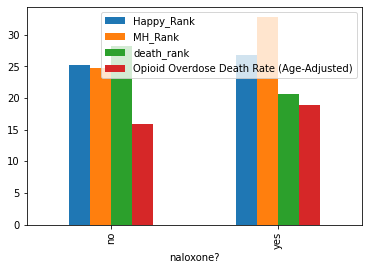

In [81]:
#lets try aggregating this data with a group_by instead 
all_states_bar = pd.concat([no_naloxone_states,naloxone_states], ignore_index=True)
compare_states = all_states_bar.groupby('naloxone?')
compare_states1 = compare_states.mean()

#plot to visualize this data 
compare_states1.plot(kind = 'bar')

plt.show()

Looking at this information: we can see average deaths for states without naloxone restriction by prescription have higher rates of opioid overdoes than those states who do not allow individuals to obtain naloxone as easily. This brings me to twp possible conclusions 

- 1. having readily accessible naloxone allows for drug users to push boundaries with their use as they can more easily prepare others to help them in case of an accidental overdose
- 2. Because only 8 states actually have this allowance, it is likely there isn't enough data to say that this average is actually helpful in determining the effects of expanding naloxone access. Additionally, two of the states who rank in the top 10 for overdose deaths are on the list for naloxone allowance without a prescription, so it is possible these states chose to implement this to battle the effects of opioid misuse, but that it has not yet been enough time. 
- note: in my opinion, even in states where you can get it without a prescription, it is not always widely promoted or talked about in a way that allows for more individuals to learn about how and when to use naloxone for themselves, their loved ones, or eben stangers. 

While these results may make it appear that naloxone is not a good aid in fighting the opioid crisis, I believe it simply is not prominent enough yet to do an accurate study on its effects in communitys with a high drug -use rate. 

## Problem Applicability and Summary 

The purpose of my project was to better understand the data that surrounds the opioid epidemic, and to get a sense of which states face the highest incidences and try to get an understanding about why these states have such high rates.
The states that face the highest rate of death due to opioid overdose are: 
  - ['Delaware',
 'West Virginia',
 'Maryland',
 'District of Columbia',
 'Connecticut',
 'Ohio',
 'New Hampshire',
 'Massachusetts',
 'New Jersey',
 'Maine']


After I obtained this list, I compared which states were the in the ten most "unhappy" list as well as the highest rates of serious mental illness. 
West Virginia and Ohio are in the list of highest opioid overdose rate as well as in the top ten for serious mental illness prevalence. West Virigina also ranks in the top ten most unhappy states as well. 

I used the state data about death rates and happiness along with the knowledge about naloxone laws and how they differ per state. I wanted to see if having naloxone access laws helps to have a decreased amount of fatal overdoses. For example, 8 states have laws that allow for anyone to get naloxone from a pharmacist without a prescription. Unfortunately, as stated above the results of my analysis do not support the idea that easier access to naloxone is correlated with lower deaths from opioid overdose. That said, I firmly believe there is not enoughd data here about states death rates before and after changing their naloxone access standards. I have family members living in the states where you can get naloxone without a prescirption and many of them do not even know what it is or what it does. I think we need to spread naloxone awareness on a nation wide level, as it is hard to see if its really helping when it is only in 8 states. Additioanlly, many of the states on the naloxone list are not those that are in the top ten of overdose deaths due to opioids. New Hampshire is the only state that ranks in the top ten for opioid overdose deaths and also allows for naloxone distribution without a prescritpion. 


In a real world setting, the purpose of this whole project is to highlight the communities still in most need of resources to battle this very sad epidemic. Next, it is useful to see the connection between depression and anxiety, as well as happiness scores, and how this is correlated with overdose fatalities. Lastly, the naloxone law comparisons by state aim to show whether or not more states might benefit from implementing these same laws and to draw attention to the usefulness and effectiveness of naloxone distribution as a way to mitigate opioid misuse and fight back against this epidemic. This project is interesting because despite efforts to reduce misuse, the problem has continued to worsen in recent years. This issue is deeply tied to the pharma industry and it's financial gains. The more we know about the causes of this epidemic and the proposed solutions many states are trying, the better chance we have as a nation in saving more lives in the future. A goal of this project is to promote public awareness of the issue and solutions as well. So many people, myself included, have a personal connection to this issue and wish to share with those among them. That is the reason this project would be of interest to many as well. 

In [65]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add eversman_final.ipynb
    !git commit -a -m "Submitting the final"
    !git push
else:
    print('''
    
OK. We can wait.
''')


Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

 yes


[main fc9f92f] Submitting the final
 2 files changed, 91 insertions(+), 33 deletions(-)
Counting objects: 6, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 1.40 KiB | 1.40 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To github.com:lillyeversman/hds5210-2022.git
   2cade7c..fc9f92f  main -> main
